# Sneak Peak of Time Series Forecasting

### Justin S. Eloriaga, Emory University

The goal of this lecture is to present one of the biggest applications of being able to manage data. That is, being able to use it to forecast future data. Practically, this is a good skill to have. Being able to forecast future data is essential, especially if you want to do the following: 
1. Experience monetary gain 
2. Control for expectations and unobservables
3. Understand how the whole economic system works

We will be using the $\texttt{StatsForecast}$ package in Python. A very fast, open sourced, and modern forecasting library. 

In [ ]:
pip install statsforecast

Note: You may need a lower version of Python, but in my experience, it should work with all 

It is always useful to work with a simple example that the developer wants everyone to know. So, let's try that first

In [20]:
from statsforecast import StatsForecast
from statsforecast.models import AutoARIMA
from statsforecast.utils import AirPassengersDF

df = AirPassengersDF
sf = StatsForecast(
    models=[AutoARIMA(season_length=12)],
    freq='ME',
)
sf.fit(df)
sf.predict(h=12, level=[95])

,unique_id,ds,AutoARIMA,AutoARIMA-lo-95,AutoARIMA-hi-95
0,1.0,1961-01-31,444.309575,421.279342,467.339808
1,1.0,1961-02-28,418.213738,390.227635,446.199842
2,1.0,1961-03-31,446.243407,412.910032,479.576782
3,1.0,1961-04-30,488.234222,450.621360,525.847085
4,1.0,1961-05-31,499.237066,457.694833,540.779299
5,1.0,1961-06-30,562.236186,517.130960,607.341411
6,1.0,1961-07-31,649.236458,600.822427,697.650489
7,1.0,1961-08-31,633.236374,581.727785,684.744963
8,1.0,1961-09-30,535.236400,480.808288,589.664512
9,1.0,1961-10-31,488.236392,431.037766,545.435018


To get started, always note that the $\textbf{long}$ dataframe is used. That dataframe has three columns, unique_id, ds, and y. The details are self explanatory. As such, if you want to import data, you need it to be in this format

In [22]:
df

,unique_id,ds,y
0,1.0,1949-01-31,112.0
1,1.0,1949-02-28,118.0
2,1.0,1949-03-31,132.0
3,1.0,1949-04-30,129.0
4,1.0,1949-05-31,121.0
...,...,...,...
139,1.0,1960-08-31,606.0
140,1.0,1960-09-30,508.0
141,1.0,1960-10-31,461.0
142,1.0,1960-11-30,390.0


Let's now start with a very practical exercise. We're gonna do a baby version of it but you can of course experiement with more. 

Let us download some stock prices using the Yahoo Finance API. You may need to install that in Python first. Then, let us choose some of the stocks that I personnaly bought over the past few years. 

In [38]:
import yfinance as yf

# Define the list of stock tickers
tickers = ['AAPL', 'MSFT', 'GOOGL', 'NVDA', 'TSLA', 'WMT', 'CVX', 'CVNA', 'BTC-USD', 'CMG']

# Define the start and end dates
start_date = '2010-01-01'
end_date = '2023-12-31'

# Download the stock data
stock_data = yf.download(tickers, start=start_date, end=end_date, interval='1mo', group_by='ticker')

# Select only the 'Adj Close' column
adj_close_data = stock_data.loc[:, (slice(None), 'Adj Close')]

# Flatten the column MultiIndex to retain only tickers
adj_close_data.columns = adj_close_data.columns.droplevel(1)

# Drop rows with missing values
adj_close_data.dropna(how='any', inplace=True)

# Reset the index and convert to long format
long_format = adj_close_data.reset_index().melt(id_vars='Date', var_name='unique_id', value_name='y')

# Rename the 'Date' column to 'ds'
long_format.rename(columns={'Date': 'ds'}, inplace=True)

# Reorder the columns
long_format = long_format[['unique_id', 'ds', 'y']]

# Display the reordered long format dataset
print(long_format)

# Rename long_format to stocks_df
stocks_df = long_format

[*********************100%***********************]  10 of 10 completed

    unique_id         ds          y
0        CVNA 2017-05-01  10.050000
1        CVNA 2017-06-01  20.469999
2        CVNA 2017-07-01  19.520000
3        CVNA 2017-08-01  17.850000
4        CVNA 2017-09-01  14.680000
..        ...        ...        ...
795      NVDA 2023-08-01  49.332611
796      NVDA 2023-09-01  43.479267
797      NVDA 2023-10-01  40.764854
798      NVDA 2023-11-01  46.752628
799      NVDA 2023-12-01  49.503613

[800 rows x 3 columns]



/var/folders/ch/hh05jl8911q5dhp_1wptbrym0000gn/T/ipykernel_28389/2700801600.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adj_close_data.dropna(how='any', inplace=True)


Getting monthly stock prices is never used in practice, we obviously use daily (and sometimes intra day), but its enough for us to get the ball rolling and actually be able to run codes within the class time

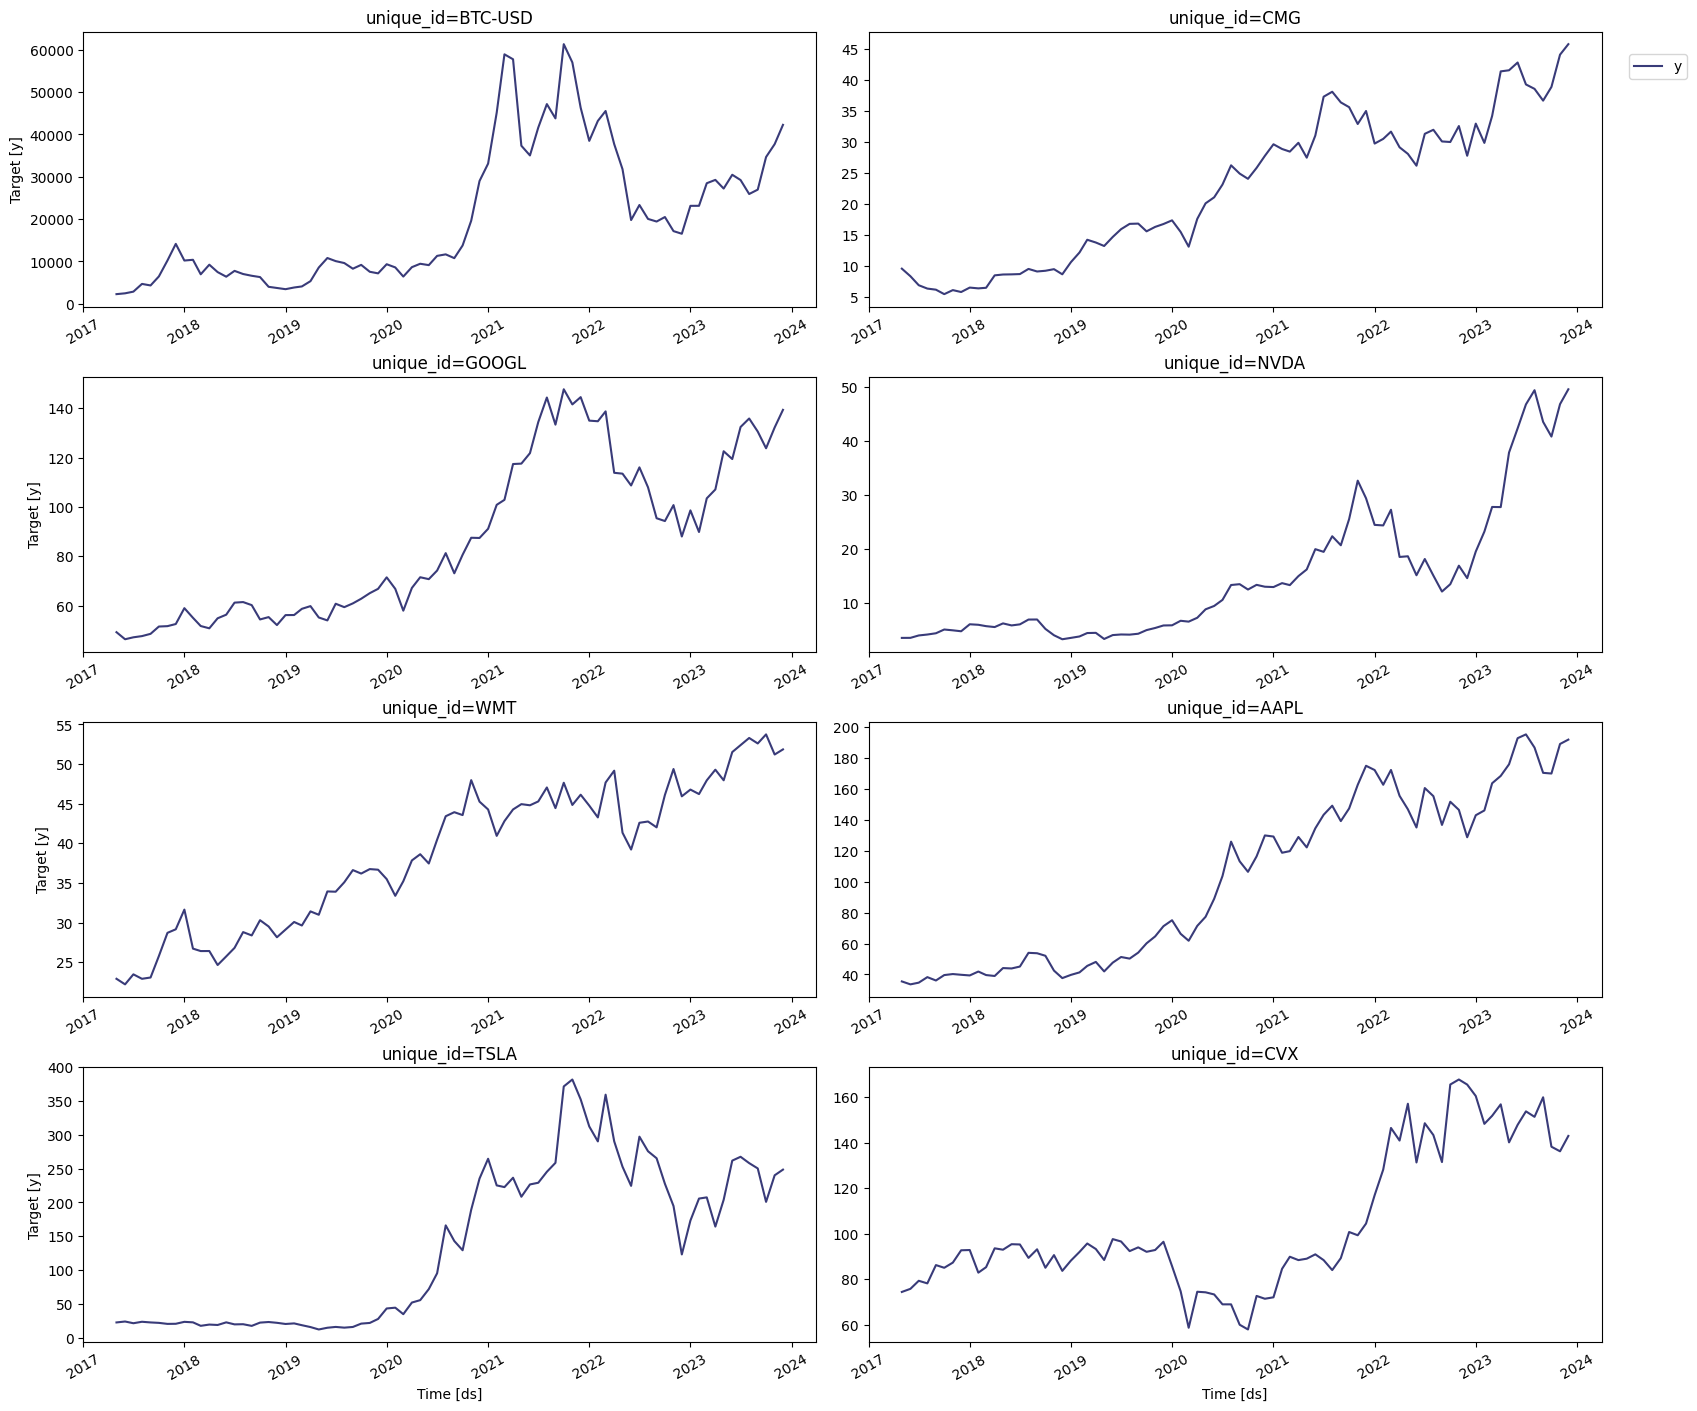

In [40]:
StatsForecast.plot(stocks_df)

Let's now initiate a new statsforecast object with it just running the ARIMA model. Let us predict stock prices for the next 12 months (next year)

In [39]:
sf = StatsForecast(
    models=[AutoARIMA(season_length=12)],
    freq='ME',
)
sf.fit(stocks_df)
sf.predict(h=12, level=[95])

,unique_id,ds,AutoARIMA,AutoARIMA-lo-95,AutoARIMA-hi-95
0,AAPL,2023-12-31,193.566953,175.435329,211.698576
1,AAPL,2024-01-31,195.542520,169.900533,221.184507
2,AAPL,2024-02-29,197.518088,166.113195,228.922980
3,AAPL,2024-03-31,199.493655,163.230409,235.756902
4,AAPL,2024-04-30,201.469223,160.925681,242.012765
...,...,...,...,...,...
115,WMT,2024-07-31,55.563909,48.972056,62.155762
116,WMT,2024-08-31,55.956714,49.218423,62.695005
117,WMT,2024-09-30,56.347919,49.469800,63.226038
118,WMT,2024-10-31,56.738169,49.725034,63.751305


Much better to see this in a graph, so let's try and do that

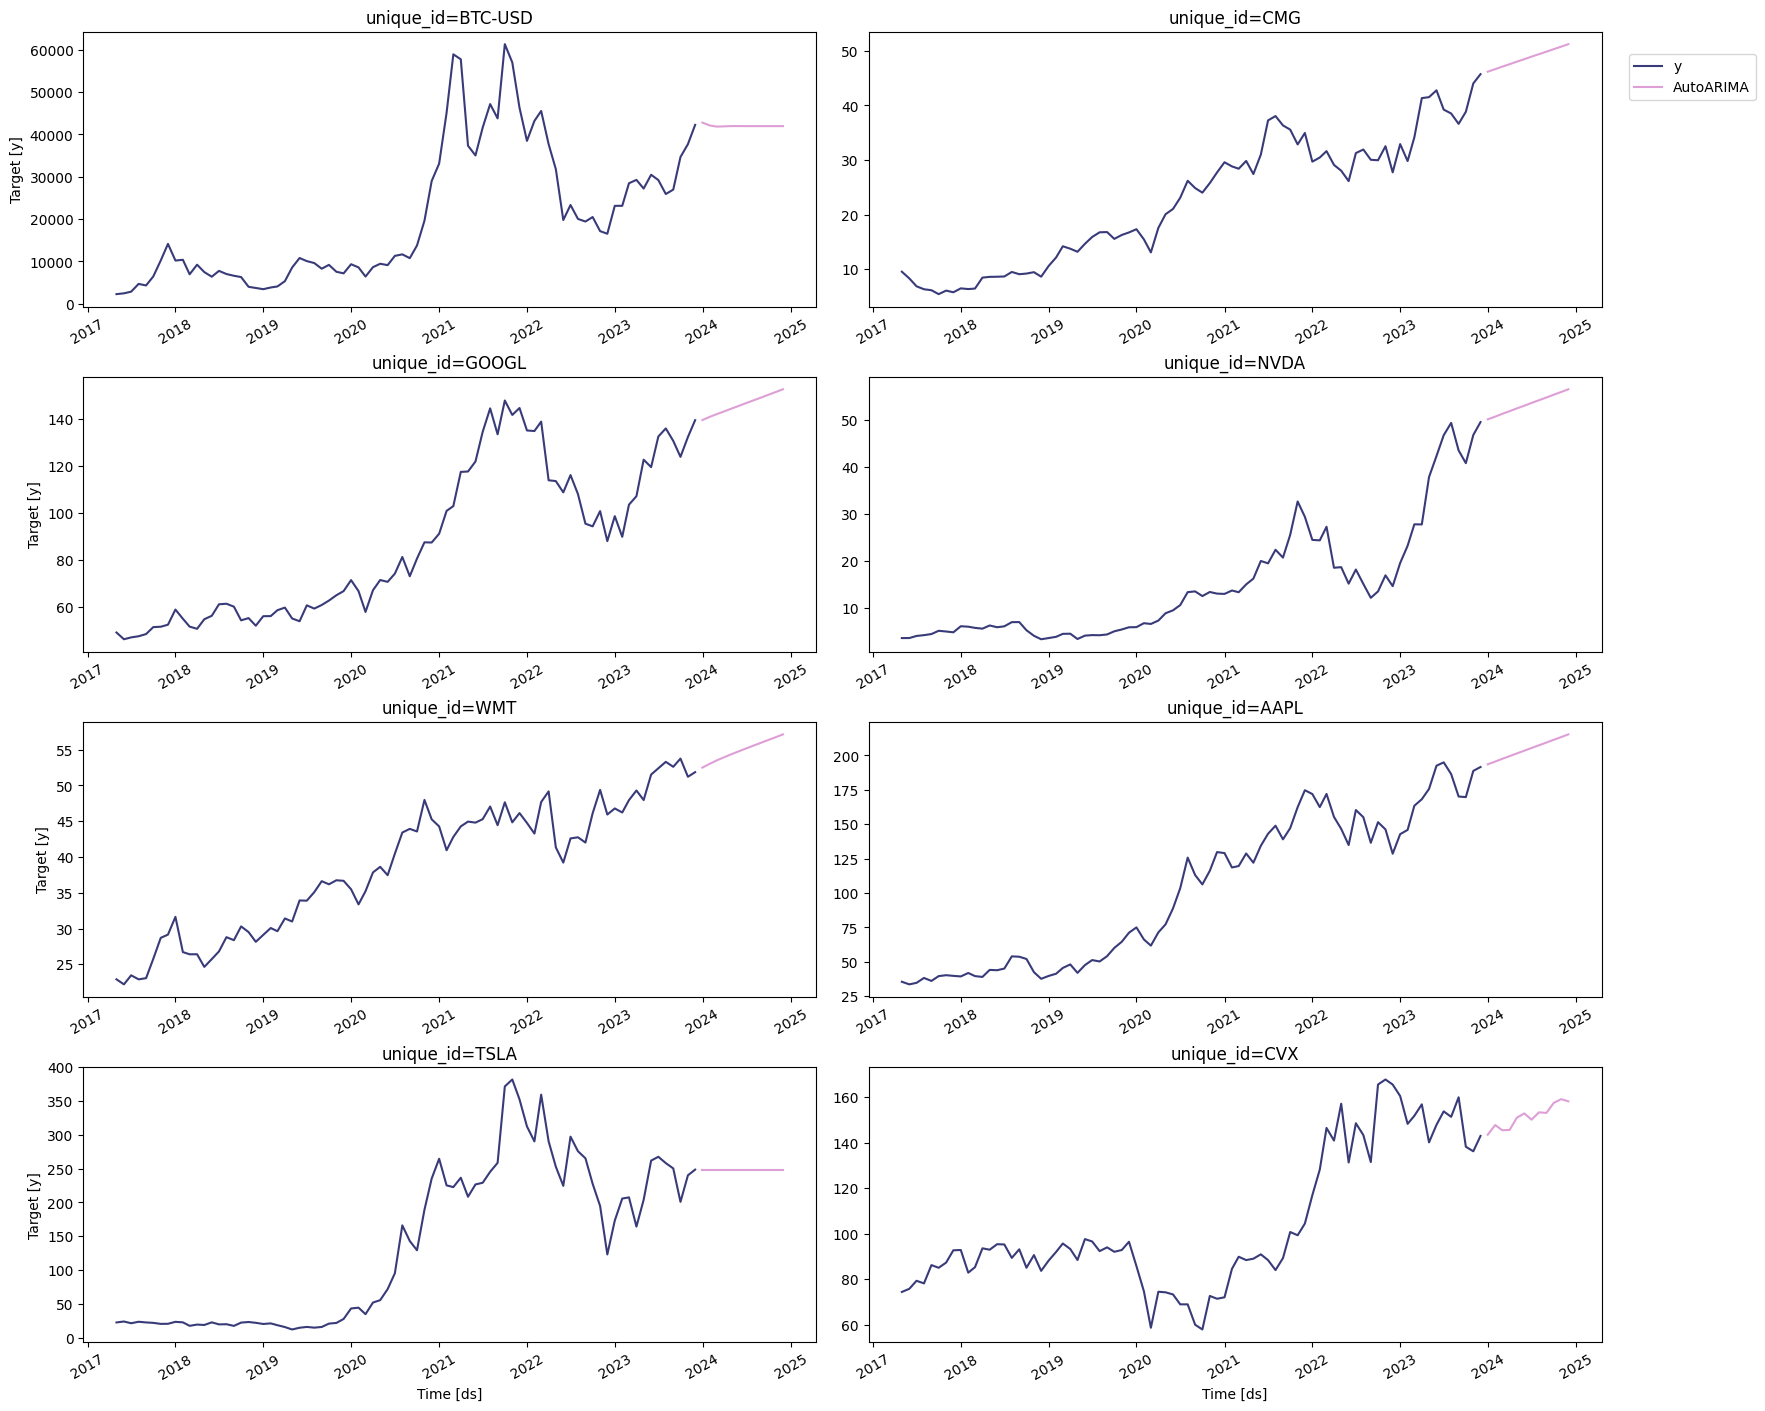

In [43]:
forecasts_df = sf.forecast(df=stocks_df, h=12, level=[95])
sf.plot(stocks_df,forecasts_df)

Obviously, it isn't the best, but it is better than no insight. At the very least, its a good "buy" or "sell" indicator if you were an investor that wants to just hold stocks for a while

Modern forecasting involves the use of multiple models. What we do is we want to gain insight from many models, but not get too bogged down by having many sources to choose from. As such, you either want to choose the best model out of a few competing models OR you take an average of the forecast across models. 

In [106]:
from statsforecast.models import (
    HoltWinters,
    CrostonClassic as Croston, 
    HistoricAverage,
    DynamicOptimizedTheta as DOT,
    SeasonalNaive
)


In [108]:
# Create a list of models
models = [
    HistoricAverage(),
    AutoARIMA(season_length=12),  # Explicitly declare season length
    Croston(),
    DOT(),
    HoltWinters(season_length=12),  # Explicitly declare season length
    SeasonalNaive(season_length=12)  # Explicitly declare season length
]

Then, after loading these many models, let's reinitiate our sf object.

In [122]:
# Instantiate StatsForecast class
sf = StatsForecast(
    models=models,
    freq='ME',  # Monthly frequency
    n_jobs=-1  # Use all available CPU cores
)

Let's reforecast our stock_df using all the models

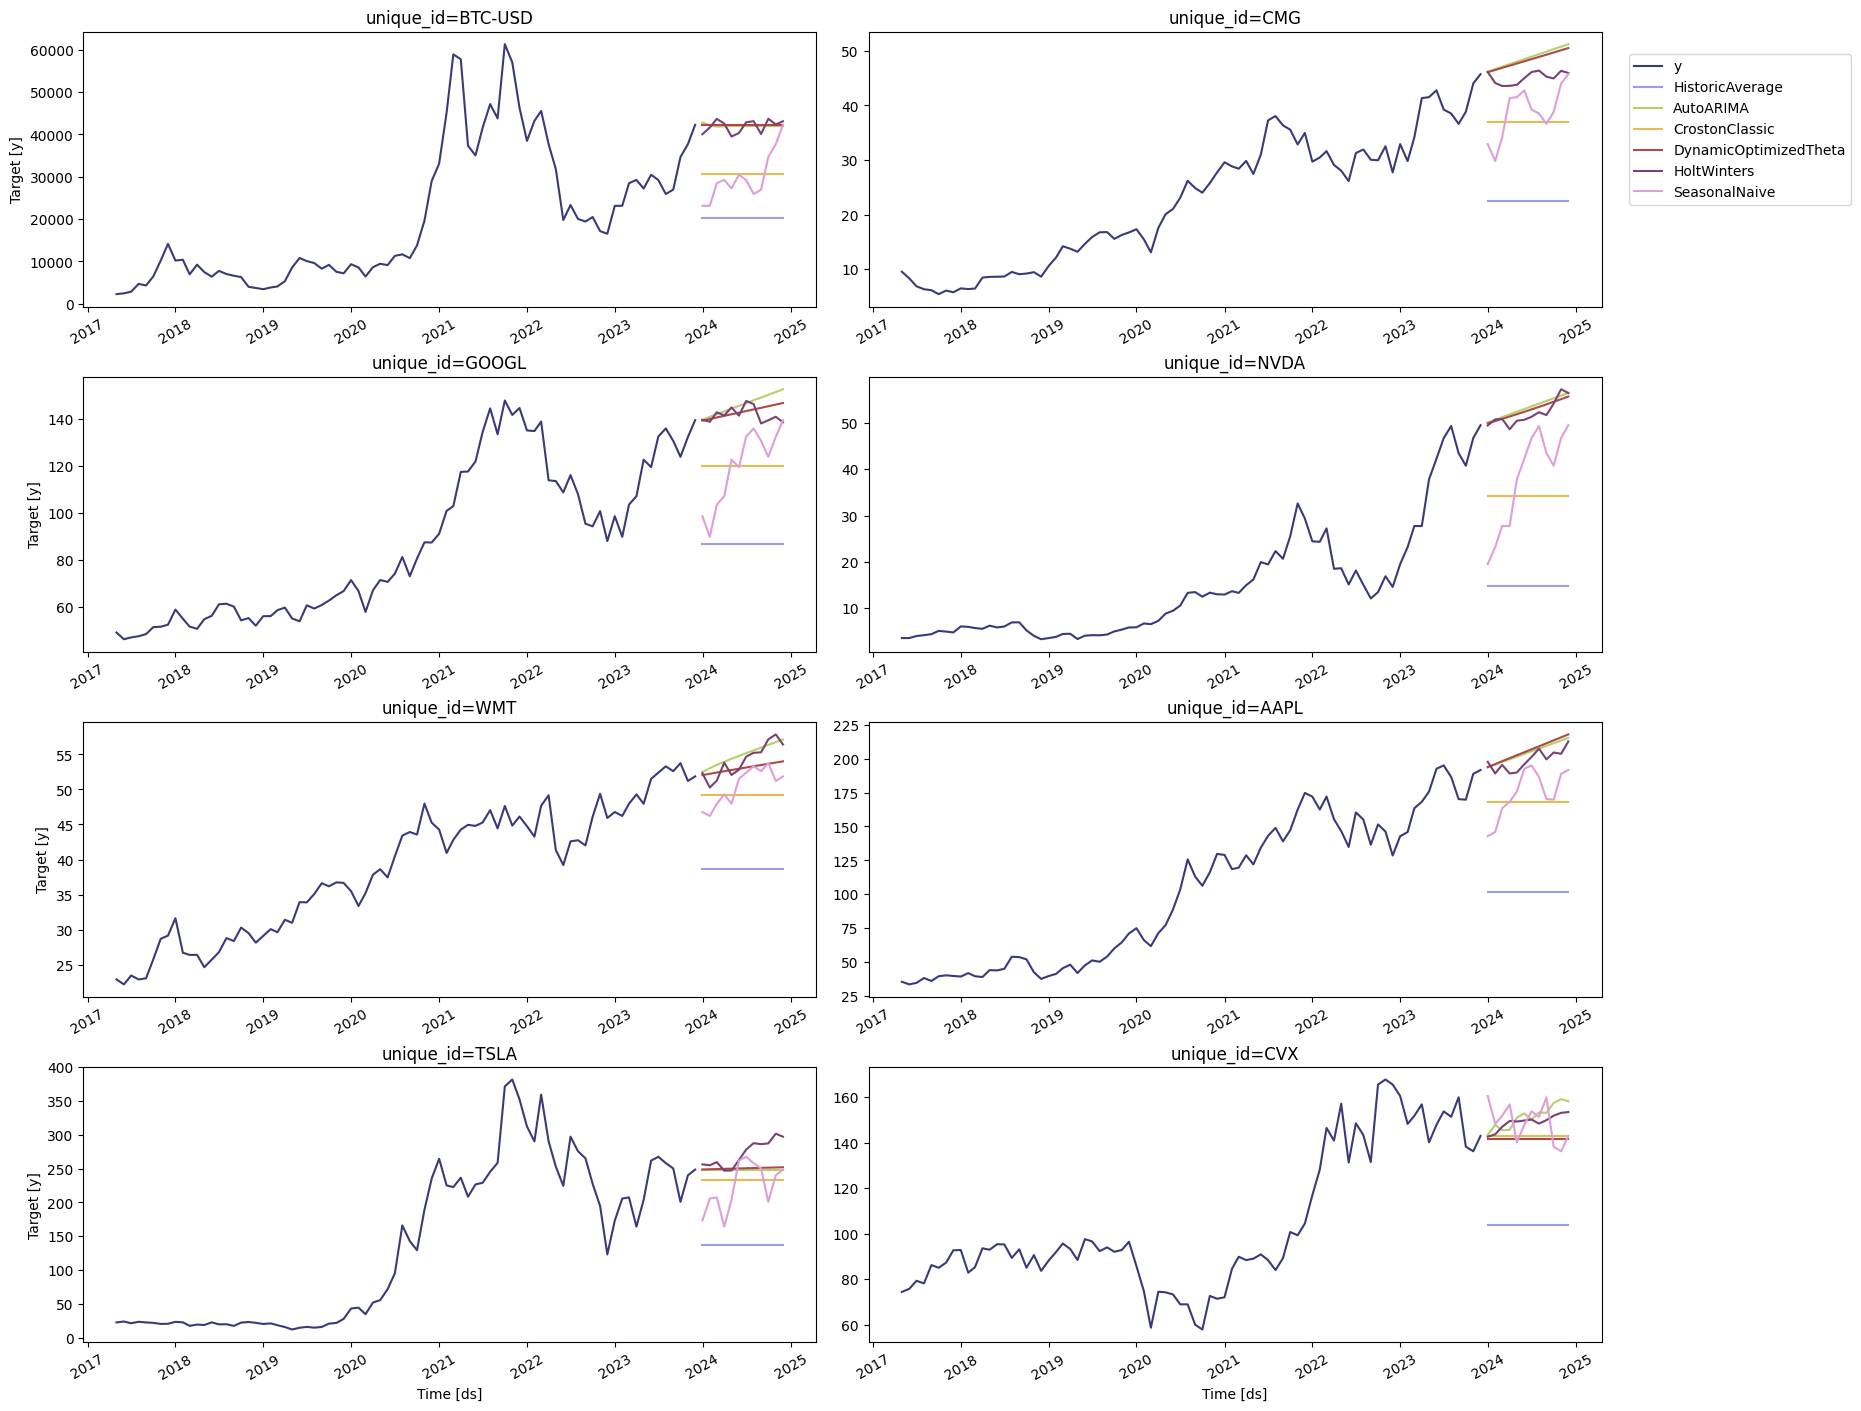

In [126]:
# Forecast with declared seasonal data
forecasts_df = sf.forecast(df=stocks_df, h=12)

# Plot forecasts
sf.plot(stocks_df, forecasts_df)

Our forecasts are kinda bad, but its okay for now. Take the time series course to know how to improve these. Next, we need to do some $\textbf{Cross Validation}$, essentially to see how bad our models are and how to pick among them

In [127]:
cv_df = sf.cross_validation(
    df=stocks_df,
    h=12,
    step_size=12,
    n_windows=2
)


In [128]:
cv_df.head()

,unique_id,ds,cutoff,y,HistoricAverage,AutoARIMA,CrostonClassic,DynamicOptimizedTheta,HoltWinters,SeasonalNaive
0,AAPL,2022-01-01,2021-12-01,171.963104,75.88841,175.953547,128.45544,176.940140,158.586256,129.037735
1,AAPL,2022-02-01,2021-12-01,162.458817,75.88841,171.024891,128.45544,179.336395,160.571093,118.574699
2,AAPL,2022-03-01,2021-12-01,172.014740,75.88841,171.518925,128.45544,181.788895,160.638988,119.623482
3,AAPL,2022-04-01,2021-12-01,155.306808,75.88841,175.813725,128.45544,184.292130,171.132617,128.740906
4,AAPL,2022-05-01,2021-12-01,146.627747,75.88841,172.653753,128.45544,186.841187,169.314715,122.032608


Let's use some more evaluation measures

In [129]:
from utilsforecast.losses import mse

def evaluate_cv(df, metric):
    models = df.columns.drop(['unique_id', 'ds', 'y', 'cutoff']).tolist()
    evals = metric(df, models=models)
    evals['best_model'] = evals[models].idxmin(axis=1)
    return evals

evaluation_df = evaluate_cv(cv_df, mse)
evaluation_df.head()

,unique_id,HistoricAverage,AutoARIMA,CrostonClassic,DynamicOptimizedTheta,HoltWinters,SeasonalNaive,best_model
0,AAPL,6.715668e+03,1.779176e+03,9.972201e+02,1.860708e+03,1.020366e+03,1.063619e+03,CrostonClassic
1,BTC-USD,1.935453e+08,2.874094e+08,1.215005e+08,3.501540e+08,6.273290e+08,3.843379e+08,CrostonClassic
2,CMG,2.726954e+02,1.166774e+02,5.207708e+01,9.402903e+01,6.805830e+01,6.436175e+01,CrostonClassic
3,CVNA,6.810715e+03,2.380294e+04,2.230527e+04,2.230510e+04,2.774804e+04,3.192636e+04,HistoricAverage
4,CVX,3.356453e+03,2.202680e+03,1.957955e+03,1.166616e+03,1.456799e+03,1.832565e+03,DynamicOptimizedTheta


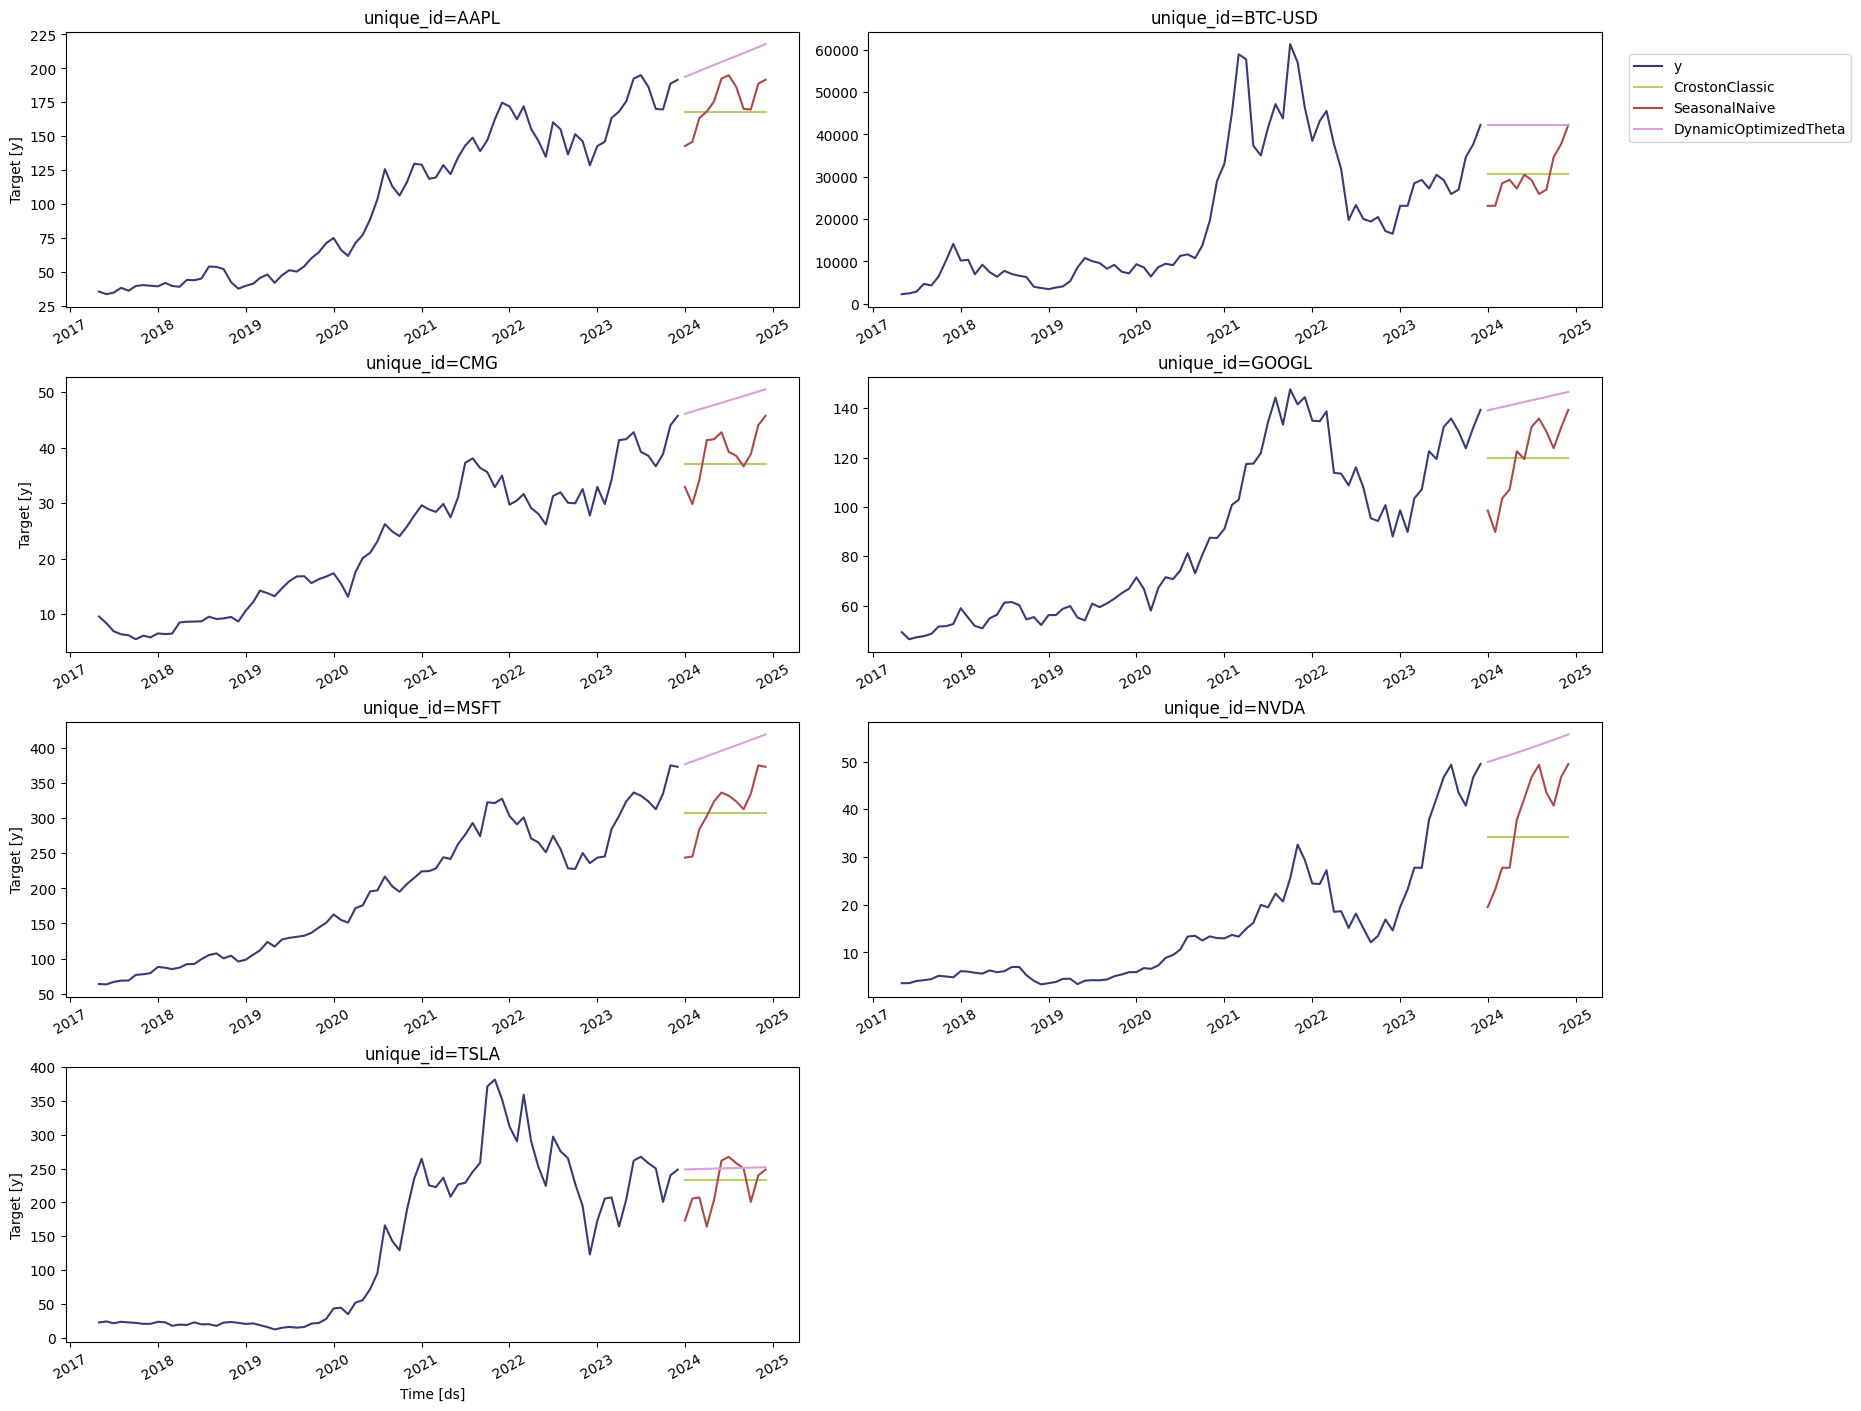

In [132]:
seasonal_ids = evaluation_df.query('best_model == "CrostonClassic"')['unique_id']
sf.plot(stocks_df,forecasts_df, unique_ids=seasonal_ids, models=["CrostonClassic","SeasonalNaive","DynamicOptimizedTheta"])

As you can see, sometimes, the obvious choice is not the choice. Some models just match the pattern, others focus on the trend. You want a mix of both in most cases, but it really depends. That's the art of forecasting